<a href="https://colab.research.google.com/github/Dawudis/Democrat-vs-Republican-Tweets-Sentiment-and-Subjectivity/blob/main/Democrat_vs_Republican_Tweets_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Dataset**

Democrat and Republican Tweet Dataset from Kaggle: https://www.kaggle.com/datasets/kapastor/democratvsrepublicantweets

In [1]:
from google.colab import files
uploaded = files.upload()

Saving ExtractedTweets.csv to ExtractedTweets.csv


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('ExtractedTweets.csv')
df.head()

,Party,Handle,Tweet
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P..."
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...


Split Dataset Into Tweets Coming from Democrat and Republican Parties

In [4]:
democrat = df[df['Party'].str.contains("Democrat")]
democrat.head()

,Party,Handle,Tweet
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P..."
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...


In [5]:
democrat.shape

(42068, 3)

In [6]:
republican = df[df['Party'].str.contains("Republican")]
republican.head()

,Party,Handle,Tweet
42068,Republican,RepRalphNorman,"It's #WastefulWednesday! \n\nToday, I introduc..."
42069,Republican,RepRalphNorman,Today we honored all the heroic men &amp; wome...
42070,Republican,RepRalphNorman,"RT @CongressmanRaja: Last week, @RepRalphNorma..."
42071,Republican,RepRalphNorman,RT @TegaCayPD: Chief Parker was thankful to re...
42072,Republican,RepRalphNorman,I visited the SC Highway Patrol to bring them ...


In [7]:
republican.shape

(44392, 3)

Keep Equal Number of Rows for Both Datasets

We Want to Take a Small Amount for Faster Runtime (This is Customizable)

In [8]:
democrat = democrat[0:2000]

In [9]:
republican = republican[0:2000]

# **Sentiment Analysis**

Install Dependencies

In [ ]:
!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/torch_stable.html
import torch

In [ ]:
!pip install transformers 
from transformers import AutoTokenizer, AutoModelForSequenceClassification
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

Defining Sentiment Score Function

In [12]:
def sentiment_score(articles):
    tokens = tokenizer.encode(articles, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

Apply Sentiment Analysis on Democrat Dataset and Republican Dataset

In [13]:
democrat['sentiment'] = democrat['Tweet'].apply(lambda x: sentiment_score(x[:512]))
democrat.head()

,Party,Handle,Tweet,sentiment
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P...",5
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...,5
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...,1
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...,5
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...,1


In [14]:
republican['sentiment'] = republican['Tweet'].apply(lambda x: sentiment_score(x[:512]))
republican.head()

,Party,Handle,Tweet,sentiment
42068,Republican,RepRalphNorman,"It's #WastefulWednesday! \n\nToday, I introduc...",1
42069,Republican,RepRalphNorman,Today we honored all the heroic men &amp; wome...,5
42070,Republican,RepRalphNorman,"RT @CongressmanRaja: Last week, @RepRalphNorma...",5
42071,Republican,RepRalphNorman,RT @TegaCayPD: Chief Parker was thankful to re...,5
42072,Republican,RepRalphNorman,I visited the SC Highway Patrol to bring them ...,5


# **Subjectivity**

In [15]:
from textblob import TextBlob

Define Function for Subjectivity Extraction

In [16]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

Apply Function to Both Datasets

In [17]:
democrat['subjectivity'] = democrat['Tweet'].apply(getSubjectivity)

In [18]:
democrat.head()

,Party,Handle,Tweet,sentiment,subjectivity
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P...",5,0.7
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...,5,0.0
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...,1,0.3
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...,5,0.2
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...,1,0.0


In [19]:
republican['subjectivity'] = republican['Tweet'].apply(getSubjectivity)

In [20]:
republican.head()

,Party,Handle,Tweet,sentiment,subjectivity
42068,Republican,RepRalphNorman,"It's #WastefulWednesday! \n\nToday, I introduc...",1,0.000000
42069,Republican,RepRalphNorman,Today we honored all the heroic men &amp; wome...,5,0.900000
42070,Republican,RepRalphNorman,"RT @CongressmanRaja: Last week, @RepRalphNorma...",5,0.133333
42071,Republican,RepRalphNorman,RT @TegaCayPD: Chief Parker was thankful to re...,5,0.000000
42072,Republican,RepRalphNorman,I visited the SC Highway Patrol to bring them ...,5,0.000000


# **Configuring the Visualization**

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

In [22]:
import numpy as np

Creating the Labels and X/Y Values for the Subjectivity

In [23]:
labels = ['Not Subjective (< 0.5)', 'Subjective (> 0.5)'] 
#'Not Subjective' are the tweets which had under a 0.5 subjectivity score while 'Subjective' are the ones above a 0.5 subjectivity score.

In [24]:
democrat_subjectivity = [len(democrat[(democrat['subjectivity'] < 0.50)]), len(democrat[(democrat['subjectivity'] >= 0.50)])]
#We take the count of how many rows fit the condition of the subjectivity score being under or over/equal to 0.50. 

In [25]:
republican_subjectivity = [len(republican[(republican['subjectivity'] < 0.50)]), len(republican[(republican['subjectivity'] >= 0.50)])] 

Creating the Labels and X/Y Values for the Sentiment

In [26]:
labels1 = ['Positive (> 3)', 'Neutral (3)', 'Negative (< 3)'] 
#Since the sentiment scoring is from 1 to 5, positive are rows that scored over 3, neutral are rows that scored 3 exactly, and negative are rows that scored under 3.

In [27]:
democrat_sentiment = [len(democrat[(democrat['sentiment'] > 3)]), len(democrat[(democrat['sentiment'] == 3)]), len(democrat[(democrat['sentiment'] < 3)])]

In [28]:
republican_sentiment = [len(republican[(republican['sentiment'] > 3)]), len(republican[(republican['sentiment'] == 3)]), len(republican[(republican['sentiment'] < 3)])]

Use Matplotlib and Numpy to Create the Bar Charts

In [29]:
#This is a function that displays each bar's height/count within the chart.
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

Creating the Chart for Subjectivity

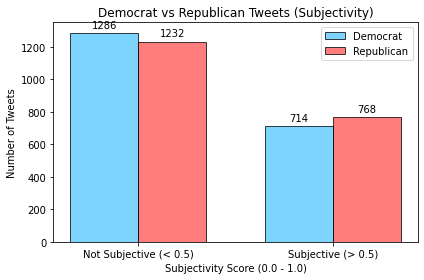

In [30]:
x = np.arange(len(labels))
width = 0.35  

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, democrat_subjectivity, width, color='#51C8FF', edgecolor='black', linewidth=1, alpha=0.75, label='Democrat')
rects2 = ax.bar(x + width/2, republican_subjectivity, width, color='#FF5151', edgecolor='black', linewidth=1, alpha=0.75, label='Republican')

ax.set_ylabel('Number of Tweets')
ax.set_xlabel('Subjectivity Score (0.0 - 1.0)')
ax.set_title('Democrat vs Republican Tweets (Subjectivity)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

Creating the Chart for Sentiment

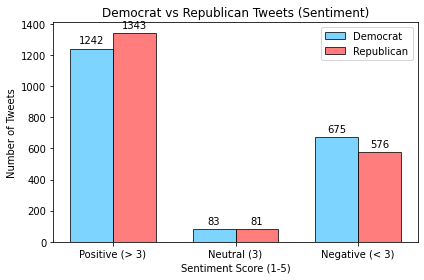

In [31]:
x = np.arange(len(labels1))
width = 0.35 

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, democrat_sentiment, width, color='#51C8FF', edgecolor='black', linewidth=1, alpha=0.75, label='Democrat')
rects2 = ax.bar(x + width/2, republican_sentiment, width, color='#FF5151', edgecolor='black', linewidth=1, alpha=0.75, label='Republican')

ax.set_ylabel('Number of Tweets')
ax.set_xlabel('Sentiment Score (1-5)')
ax.set_title('Democrat vs Republican Tweets (Sentiment)')
ax.set_xticks(x)
ax.set_xticklabels(labels1)
ax.legend()

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

# **Extra: More Detailed Visualization**

More Labels and More Detailed Charts

In [32]:
labels = ['Not Subjective', 'Less Subjective', 'Subjective', 'Very Subjective']

In [33]:
democrat_subjectivity = [len(democrat[(democrat['subjectivity'] <= 0.25)]), len(democrat[(democrat['subjectivity'] >= 0.26) & (democrat['subjectivity'] <= 0.50)]), 
                         len(democrat[(democrat['subjectivity'] >= 0.51) & (democrat['subjectivity'] <= 0.75)]), len(democrat[(democrat['subjectivity'] >= 0.76)])] 

In [34]:
republican_subjectivity = [len(republican[(republican['subjectivity'] <= 0.25)]), len(republican[(republican['subjectivity'] >= 0.26) & (republican['subjectivity'] <= 0.50)]), 
                         len(republican[(republican['subjectivity'] >= 0.51) & (republican['subjectivity'] <= 0.75)]), len(republican[(republican['subjectivity'] >= 0.76)])] 

In [35]:
labels1 = ['Very Positive', 'Positive', 'Neutral', 'Negative', 'Very Negative']

In [36]:
democrat_sentiment = [len(democrat[(democrat['sentiment'] == 5)]), len(democrat[(democrat['sentiment'] == 4)]), len(democrat[(democrat['sentiment'] == 3)]), len(democrat[(democrat['sentiment'] == 2)]), 
            len(democrat[(democrat['sentiment'] == 1)])]

In [37]:
republican_sentiment = [len(republican[(republican['sentiment'] == 5)]), len(republican[(republican['sentiment'] == 4)]), len(republican[(republican['sentiment'] == 3)]), len(republican[(republican['sentiment'] == 2)]), 
              len(republican[(republican['sentiment'] == 1)])]

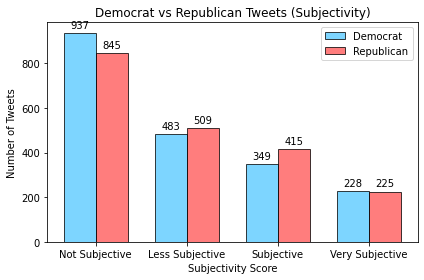

In [38]:
x = np.arange(len(labels)) 
width = 0.35  

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, democrat_subjectivity, width, color='#51C8FF', edgecolor='black', linewidth=1, alpha=0.75, label='Democrat')
rects2 = ax.bar(x + width/2, republican_subjectivity, width, color='#FF5151', edgecolor='black', linewidth=1, alpha=0.75, label='Republican')

ax.set_ylabel('Number of Tweets')
ax.set_xlabel('Subjectivity Score')
ax.set_title('Democrat vs Republican Tweets (Subjectivity)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

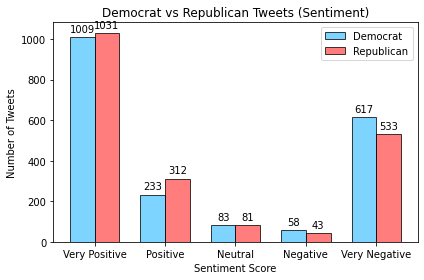

In [39]:
x = np.arange(len(labels1))
width = 0.35 

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, democrat_sentiment, width, color='#51C8FF', edgecolor='black', linewidth=1, alpha=0.75, label='Democrat')
rects2 = ax.bar(x + width/2, republican_sentiment, width, color='#FF5151', edgecolor='black', linewidth=1, alpha=0.75, label='Republican')

ax.set_ylabel('Number of Tweets')
ax.set_xlabel('Sentiment Score')
ax.set_title('Democrat vs Republican Tweets (Sentiment)')
ax.set_xticks(x)
ax.set_xticklabels(labels1)
ax.legend()

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()